In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 300)

In [3]:
#2016年のイベントデータ
data2016 = pd.read_csv('C:/Users/nukan/Desktop/work/25_Python/MLB_analysis/data/play_by_play_2016.csv', sep='\t')
print(data2016.shape)
data2016.head(30)

(190715, 35)


,game_dt,game_id,home_team_id,away_team_id,inn_ct,bat_home_id,outs_ct,balls_ct,strikes_ct,bat_lineup_id,pitch_seq_tx,event_tx,away_score_ct,home_score_ct,bat_id,pit_id,start_bases_cd,event_cd,bat_event_fl,ab_fl,sf_fl,bunt_fl,h_cd,bat_dest_id,base1_run_id,base2_run_id,base3_run_id,run1_dest_id,run2_dest_id,run3_dest_id,event_outs_ct,battedball_cd,battedball_loc_tx,fld_cd,rbi_ct
0,20160403,KCA201604030,KCA,NYN,1,0,0,2,2,1,CCBBFX,8/L,0,0,granc001,volqe001,0,2,T,T,F,F,0,0,NaN,NaN,NaN,0,0,0,1,L,NaN,8,0
1,20160403,KCA201604030,KCA,NYN,1,0,1,2,2,2,FSBBX,53/G,0,0,wrigd002,volqe001,0,2,T,T,F,F,0,0,NaN,NaN,NaN,0,0,0,1,G,NaN,5,0
2,20160403,KCA201604030,KCA,NYN,1,0,2,1,1,3,BCX,63/G-,0,0,cespy001,volqe001,0,2,T,T,F,F,0,0,NaN,NaN,NaN,0,0,0,1,G,NaN,6,0
3,20160403,KCA201604030,KCA,NYN,1,1,0,0,0,1,X,53/G-,0,0,escoa003,harvm001,0,2,T,T,F,F,0,0,NaN,NaN,NaN,0,0,0,1,G,NaN,5,0
4,20160403,KCA201604030,KCA,NYN,1,1,1,2,1,2,CBBX,E7/L,0,0,mousm001,harvm001,0,18,T,T,F,F,0,1,NaN,NaN,NaN,0,0,0,0,L,NaN,7,0
5,20160403,KCA201604030,KCA,NYN,1,1,1,1,1,3,BSB,PB.1-2,0,0,cainl001,harvm001,1,10,F,F,F,F,0,0,mousm001,NaN,NaN,2,0,0,0,NaN,NaN,0,0
6,20160403,KCA201604030,KCA,NYN,1,1,1,3,1,3,BSB.BB,W,0,0,cainl001,harvm001,2,14,T,F,F,F,0,1,NaN,mousm001,NaN,0,2,0,0,NaN,NaN,0,0
7,20160403,KCA201604030,KCA,NYN,1,1,1,2,1,4,BBCX,S7/G.2-H(UR);1-3,0,0,hosme001,harvm001,3,20,T,T,F,F,1,1,cainl001,mousm001,NaN,3,5,0,0,G,NaN,7,1
8,20160403,KCA201604030,KCA,NYN,1,1,1,2,0,5,BBX,46(1)3/GDP,0,1,morak001,harvm001,5,2,T,T,F,F,0,0,hosme001,NaN,cainl001,0,0,3,2,G,NaN,4,0
9,20160403,KCA201604030,KCA,NYN,2,0,0,2,2,4,CFBBC,K,0,1,dudal001,volqe001,0,3,T,T,F,F,0,0,NaN,NaN,NaN,0,0,0,1,NaN,NaN,0,0


## 得点価値行列の作成

In [4]:
data2016['runs'] = data2016['home_score_ct'] + data2016['away_score_ct']
data2016['half.inning'] = data2016['game_id'] + data2016['inn_ct'].astype(str) + data2016['bat_home_id'].astype(str)

func = lambda x: 1 if x>3 else 0
data2016['runs.scored'] = data2016['bat_dest_id'].apply(func) + data2016['run1_dest_id'].apply(func) + data2016['run2_dest_id'].apply(func) + data2016['run3_dest_id'].apply(func)
data2016.head(50)

,game_dt,game_id,home_team_id,away_team_id,inn_ct,bat_home_id,outs_ct,balls_ct,strikes_ct,bat_lineup_id,pitch_seq_tx,event_tx,away_score_ct,home_score_ct,bat_id,pit_id,start_bases_cd,event_cd,bat_event_fl,ab_fl,sf_fl,bunt_fl,h_cd,bat_dest_id,base1_run_id,base2_run_id,base3_run_id,run1_dest_id,run2_dest_id,run3_dest_id,event_outs_ct,battedball_cd,battedball_loc_tx,fld_cd,rbi_ct,runs,half.inning,runs.scored
0,20160403,KCA201604030,KCA,NYN,1,0,0,2,2,1,CCBBFX,8/L,0,0,granc001,volqe001,0,2,T,T,F,F,0,0,NaN,NaN,NaN,0,0,0,1,L,NaN,8,0,0,KCA20160403010,0
1,20160403,KCA201604030,KCA,NYN,1,0,1,2,2,2,FSBBX,53/G,0,0,wrigd002,volqe001,0,2,T,T,F,F,0,0,NaN,NaN,NaN,0,0,0,1,G,NaN,5,0,0,KCA20160403010,0
2,20160403,KCA201604030,KCA,NYN,1,0,2,1,1,3,BCX,63/G-,0,0,cespy001,volqe001,0,2,T,T,F,F,0,0,NaN,NaN,NaN,0,0,0,1,G,NaN,6,0,0,KCA20160403010,0
3,20160403,KCA201604030,KCA,NYN,1,1,0,0,0,1,X,53/G-,0,0,escoa003,harvm001,0,2,T,T,F,F,0,0,NaN,NaN,NaN,0,0,0,1,G,NaN,5,0,0,KCA20160403011,0
4,20160403,KCA201604030,KCA,NYN,1,1,1,2,1,2,CBBX,E7/L,0,0,mousm001,harvm001,0,18,T,T,F,F,0,1,NaN,NaN,NaN,0,0,0,0,L,NaN,7,0,0,KCA20160403011,0
5,20160403,KCA201604030,KCA,NYN,1,1,1,1,1,3,BSB,PB.1-2,0,0,cainl001,harvm001,1,10,F,F,F,F,0,0,mousm001,NaN,NaN,2,0,0,0,NaN,NaN,0,0,0,KCA20160403011,0
6,20160403,KCA201604030,KCA,NYN,1,1,1,3,1,3,BSB.BB,W,0,0,cainl001,harvm001,2,14,T,F,F,F,0,1,NaN,mousm001,NaN,0,2,0,0,NaN,NaN,0,0,0,KCA20160403011,0
7,20160403,KCA201604030,KCA,NYN,1,1,1,2,1,4,BBCX,S7/G.2-H(UR);1-3,0,0,hosme001,harvm001,3,20,T,T,F,F,1,1,cainl001,mousm001,NaN,3,5,0,0,G,NaN,7,1,0,KCA20160403011,1
8,20160403,KCA201604030,KCA,NYN,1,1,1,2,0,5,BBX,46(1)3/GDP,0,1,morak001,harvm001,5,2,T,T,F,F,0,0,hosme001,NaN,cainl001,0,0,3,2,G,NaN,4,0,1,KCA20160403011,0
9,20160403,KCA201604030,KCA,NYN,2,0,0,2,2,4,CFBBC,K,0,1,dudal001,volqe001,0,3,T,T,F,F,0,0,NaN,NaN,NaN,0,0,0,1,NaN,NaN,0,0,1,KCA20160403020,0


In [5]:
half_innings = data2016.groupby('half.inning', as_index=False).agg({'event_outs_ct': 'sum', 'runs.scored': 'sum', 'runs': 'min'})
half_innings.columns = ['half.inning', 'outs.inning', 'runs.inning', 'runs.start']
half_innings['max.runs'] = half_innings['runs.inning'] + half_innings['runs.start']
half_innings

,half.inning,outs.inning,runs.inning,runs.start,max.runs
0,ANA20160404010,3,1,0,1
1,ANA20160404011,3,0,1,1
2,ANA20160404020,3,0,1,1
3,ANA20160404021,3,0,1,1
4,ANA20160404030,3,0,1,1
...,...,...,...,...,...
43415,WAS20161002070,3,0,13,13
43416,WAS20161002071,3,0,13,13
43417,WAS20161002080,3,2,13,15
43418,WAS20161002081,3,2,15,17


In [6]:
half_innings[half_innings['half.inning']=='KCA20160403011']

,half.inning,outs.inning,runs.inning,runs.start,max.runs
17338,KCA20160403011,3,1,0,1


In [7]:
data2016 = pd.merge(data2016, half_innings, on='half.inning')
data2016['runs.roi'] = data2016['max.runs'] - data2016['runs']
data2016.head(100)

,game_dt,game_id,home_team_id,away_team_id,inn_ct,bat_home_id,outs_ct,balls_ct,strikes_ct,bat_lineup_id,pitch_seq_tx,event_tx,away_score_ct,home_score_ct,bat_id,pit_id,start_bases_cd,event_cd,bat_event_fl,ab_fl,sf_fl,bunt_fl,h_cd,bat_dest_id,base1_run_id,base2_run_id,base3_run_id,run1_dest_id,run2_dest_id,run3_dest_id,event_outs_ct,battedball_cd,battedball_loc_tx,fld_cd,rbi_ct,runs,half.inning,runs.scored,outs.inning,runs.inning,runs.start,max.runs,runs.roi
0,20160403,KCA201604030,KCA,NYN,1,0,0,2,2,1,CCBBFX,8/L,0,0,granc001,volqe001,0,2,T,T,F,F,0,0,NaN,NaN,NaN,0,0,0,1,L,NaN,8,0,0,KCA20160403010,0,3,0,0,0,0
1,20160403,KCA201604030,KCA,NYN,1,0,1,2,2,2,FSBBX,53/G,0,0,wrigd002,volqe001,0,2,T,T,F,F,0,0,NaN,NaN,NaN,0,0,0,1,G,NaN,5,0,0,KCA20160403010,0,3,0,0,0,0
2,20160403,KCA201604030,KCA,NYN,1,0,2,1,1,3,BCX,63/G-,0,0,cespy001,volqe001,0,2,T,T,F,F,0,0,NaN,NaN,NaN,0,0,0,1,G,NaN,6,0,0,KCA20160403010,0,3,0,0,0,0
3,20160403,KCA201604030,KCA,NYN,1,1,0,0,0,1,X,53/G-,0,0,escoa003,harvm001,0,2,T,T,F,F,0,0,NaN,NaN,NaN,0,0,0,1,G,NaN,5,0,0,KCA20160403011,0,3,1,0,1,1
4,20160403,KCA201604030,KCA,NYN,1,1,1,2,1,2,CBBX,E7/L,0,0,mousm001,harvm001,0,18,T,T,F,F,0,1,NaN,NaN,NaN,0,0,0,0,L,NaN,7,0,0,KCA20160403011,0,3,1,0,1,1
5,20160403,KCA201604030,KCA,NYN,1,1,1,1,1,3,BSB,PB.1-2,0,0,cainl001,harvm001,1,10,F,F,F,F,0,0,mousm001,NaN,NaN,2,0,0,0,NaN,NaN,0,0,0,KCA20160403011,0,3,1,0,1,1
6,20160403,KCA201604030,KCA,NYN,1,1,1,3,1,3,BSB.BB,W,0,0,cainl001,harvm001,2,14,T,F,F,F,0,1,NaN,mousm001,NaN,0,2,0,0,NaN,NaN,0,0,0,KCA20160403011,0,3,1,0,1,1
7,20160403,KCA201604030,KCA,NYN,1,1,1,2,1,4,BBCX,S7/G.2-H(UR);1-3,0,0,hosme001,harvm001,3,20,T,T,F,F,1,1,cainl001,mousm001,NaN,3,5,0,0,G,NaN,7,1,0,KCA20160403011,1,3,1,0,1,1
8,20160403,KCA201604030,KCA,NYN,1,1,1,2,0,5,BBX,46(1)3/GDP,0,1,morak001,harvm001,5,2,T,T,F,F,0,0,hosme001,NaN,cainl001,0,0,3,2,G,NaN,4,0,1,KCA20160403011,0,3,1,0,1,0
9,20160403,KCA201604030,KCA,NYN,2,0,0,2,2,4,CFBBC,K,0,1,dudal001,volqe001,0,3,T,T,F,F,0,0,NaN,NaN,NaN,0,0,0,1,NaN,NaN,0,0,1,KCA20160403020,0,3,0,1,1,0


In [8]:
data2016['base1_run_id'] = data2016['base1_run_id'].astype(str)
data2016['base2_run_id'] = data2016['base2_run_id'].astype(str)
data2016['base3_run_id'] = data2016['base3_run_id'].astype(str)
data2016

,game_dt,game_id,home_team_id,away_team_id,inn_ct,bat_home_id,outs_ct,balls_ct,strikes_ct,bat_lineup_id,pitch_seq_tx,event_tx,away_score_ct,home_score_ct,bat_id,pit_id,start_bases_cd,event_cd,bat_event_fl,ab_fl,sf_fl,bunt_fl,h_cd,bat_dest_id,base1_run_id,base2_run_id,base3_run_id,run1_dest_id,run2_dest_id,run3_dest_id,event_outs_ct,battedball_cd,battedball_loc_tx,fld_cd,rbi_ct,runs,half.inning,runs.scored,outs.inning,runs.inning,runs.start,max.runs,runs.roi
0,20160403,KCA201604030,KCA,NYN,1,0,0,2,2,1,CCBBFX,8/L,0,0,granc001,volqe001,0,2,T,T,F,F,0,0,nan,nan,nan,0,0,0,1,L,NaN,8,0,0,KCA20160403010,0,3,0,0,0,0
1,20160403,KCA201604030,KCA,NYN,1,0,1,2,2,2,FSBBX,53/G,0,0,wrigd002,volqe001,0,2,T,T,F,F,0,0,nan,nan,nan,0,0,0,1,G,NaN,5,0,0,KCA20160403010,0,3,0,0,0,0
2,20160403,KCA201604030,KCA,NYN,1,0,2,1,1,3,BCX,63/G-,0,0,cespy001,volqe001,0,2,T,T,F,F,0,0,nan,nan,nan,0,0,0,1,G,NaN,6,0,0,KCA20160403010,0,3,0,0,0,0
3,20160403,KCA201604030,KCA,NYN,1,1,0,0,0,1,X,53/G-,0,0,escoa003,harvm001,0,2,T,T,F,F,0,0,nan,nan,nan,0,0,0,1,G,NaN,5,0,0,KCA20160403011,0,3,1,0,1,1
4,20160403,KCA201604030,KCA,NYN,1,1,1,2,1,2,CBBX,E7/L,0,0,mousm001,harvm001,0,18,T,T,F,F,0,1,nan,nan,nan,0,0,0,0,L,NaN,7,0,0,KCA20160403011,0,3,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190710,20161002,WAS201610020,WAS,MIA,8,1,1,1,0,4,.BX,8/F,7,10,robic001,despo001,7,2,T,T,F,F,0,0,harpb003,reveb001,turnt001,1,2,3,1,F,NaN,8,0,17,WAS20161002081,0,3,2,15,17,0
190711,20161002,WAS201610020,WAS,MIA,8,1,2,3,1,5,*BBF*BX,3/G,7,10,drews001,despo001,7,2,T,T,F,F,0,0,harpb003,reveb001,turnt001,1,2,3,1,G,NaN,3,0,17,WAS20161002081,0,3,2,15,17,0
190712,20161002,WAS201610020,WAS,MIA,9,0,0,3,2,4,.CBFBBX,S7/L,7,10,yelic001,melam001,0,20,T,T,F,F,1,1,nan,nan,nan,0,0,0,0,L,NaN,7,0,17,WAS20161002090,0,3,0,17,17,0
190713,20161002,WAS201610020,WAS,MIA,9,0,0,2,0,5,BBX,36(1)1/GDP,7,10,bourj002,melam001,1,2,T,T,F,F,0,0,yelic001,nan,nan,0,0,0,2,G,NaN,3,0,17,WAS20161002090,0,3,0,17,17,0


In [9]:
func = lambda x: '1' if x != 'nan' else '0'
data2016['bases'] = data2016['base1_run_id'].apply(func) + data2016['base2_run_id'].apply(func) + data2016['base3_run_id'].apply(func)
data2016['state'] = data2016['bases'] + data2016['outs_ct'].astype(str)
data2016

,game_dt,game_id,home_team_id,away_team_id,inn_ct,bat_home_id,outs_ct,balls_ct,strikes_ct,bat_lineup_id,pitch_seq_tx,event_tx,away_score_ct,home_score_ct,bat_id,pit_id,start_bases_cd,event_cd,bat_event_fl,ab_fl,sf_fl,bunt_fl,h_cd,bat_dest_id,base1_run_id,base2_run_id,base3_run_id,run1_dest_id,run2_dest_id,run3_dest_id,event_outs_ct,battedball_cd,battedball_loc_tx,fld_cd,rbi_ct,runs,half.inning,runs.scored,outs.inning,runs.inning,runs.start,max.runs,runs.roi,bases,state
0,20160403,KCA201604030,KCA,NYN,1,0,0,2,2,1,CCBBFX,8/L,0,0,granc001,volqe001,0,2,T,T,F,F,0,0,nan,nan,nan,0,0,0,1,L,NaN,8,0,0,KCA20160403010,0,3,0,0,0,0,000,0000
1,20160403,KCA201604030,KCA,NYN,1,0,1,2,2,2,FSBBX,53/G,0,0,wrigd002,volqe001,0,2,T,T,F,F,0,0,nan,nan,nan,0,0,0,1,G,NaN,5,0,0,KCA20160403010,0,3,0,0,0,0,000,0001
2,20160403,KCA201604030,KCA,NYN,1,0,2,1,1,3,BCX,63/G-,0,0,cespy001,volqe001,0,2,T,T,F,F,0,0,nan,nan,nan,0,0,0,1,G,NaN,6,0,0,KCA20160403010,0,3,0,0,0,0,000,0002
3,20160403,KCA201604030,KCA,NYN,1,1,0,0,0,1,X,53/G-,0,0,escoa003,harvm001,0,2,T,T,F,F,0,0,nan,nan,nan,0,0,0,1,G,NaN,5,0,0,KCA20160403011,0,3,1,0,1,1,000,0000
4,20160403,KCA201604030,KCA,NYN,1,1,1,2,1,2,CBBX,E7/L,0,0,mousm001,harvm001,0,18,T,T,F,F,0,1,nan,nan,nan,0,0,0,0,L,NaN,7,0,0,KCA20160403011,0,3,1,0,1,1,000,0001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190710,20161002,WAS201610020,WAS,MIA,8,1,1,1,0,4,.BX,8/F,7,10,robic001,despo001,7,2,T,T,F,F,0,0,harpb003,reveb001,turnt001,1,2,3,1,F,NaN,8,0,17,WAS20161002081,0,3,2,15,17,0,111,1111
190711,20161002,WAS201610020,WAS,MIA,8,1,2,3,1,5,*BBF*BX,3/G,7,10,drews001,despo001,7,2,T,T,F,F,0,0,harpb003,reveb001,turnt001,1,2,3,1,G,NaN,3,0,17,WAS20161002081,0,3,2,15,17,0,111,1112
190712,20161002,WAS201610020,WAS,MIA,9,0,0,3,2,4,.CBFBBX,S7/L,7,10,yelic001,melam001,0,20,T,T,F,F,1,1,nan,nan,nan,0,0,0,0,L,NaN,7,0,17,WAS20161002090,0,3,0,17,17,0,000,0000
190713,20161002,WAS201610020,WAS,MIA,9,0,0,2,0,5,BBX,36(1)1/GDP,7,10,bourj002,melam001,1,2,T,T,F,F,0,0,yelic001,nan,nan,0,0,0,2,G,NaN,3,0,17,WAS20161002090,0,3,0,17,17,0,100,1000


In [10]:
data2016['nrunner1'] = ((data2016['bat_dest_id']==1) | (data2016['run1_dest_id']==1)).astype(int)
data2016['nrunner2'] = ((data2016['bat_dest_id']==2) | (data2016['run1_dest_id']==2) | (data2016['run2_dest_id']==2)).astype(int)
data2016['nrunner3'] = ((data2016['bat_dest_id']==3) | (data2016['run1_dest_id']==3) | (data2016['run2_dest_id']==3) | (data2016['run3_dest_id']==3)).astype(int)

data2016['nouts'] = data2016['outs_ct'] + data2016['event_outs_ct']

data2016['new.state'] = data2016['nrunner1'].astype(str) + data2016['nrunner2'].astype(str) + data2016['nrunner3'].astype(str) + data2016['nouts'].astype(str)

data2016.head(50)

,game_dt,game_id,home_team_id,away_team_id,inn_ct,bat_home_id,outs_ct,balls_ct,strikes_ct,bat_lineup_id,pitch_seq_tx,event_tx,away_score_ct,home_score_ct,bat_id,pit_id,start_bases_cd,event_cd,bat_event_fl,ab_fl,sf_fl,bunt_fl,h_cd,bat_dest_id,base1_run_id,base2_run_id,base3_run_id,run1_dest_id,run2_dest_id,run3_dest_id,event_outs_ct,battedball_cd,battedball_loc_tx,fld_cd,rbi_ct,runs,half.inning,runs.scored,outs.inning,runs.inning,runs.start,max.runs,runs.roi,bases,state,nrunner1,nrunner2,nrunner3,nouts,new.state
0,20160403,KCA201604030,KCA,NYN,1,0,0,2,2,1,CCBBFX,8/L,0,0,granc001,volqe001,0,2,T,T,F,F,0,0,nan,nan,nan,0,0,0,1,L,NaN,8,0,0,KCA20160403010,0,3,0,0,0,0,000,0000,0,0,0,1,0001
1,20160403,KCA201604030,KCA,NYN,1,0,1,2,2,2,FSBBX,53/G,0,0,wrigd002,volqe001,0,2,T,T,F,F,0,0,nan,nan,nan,0,0,0,1,G,NaN,5,0,0,KCA20160403010,0,3,0,0,0,0,000,0001,0,0,0,2,0002
2,20160403,KCA201604030,KCA,NYN,1,0,2,1,1,3,BCX,63/G-,0,0,cespy001,volqe001,0,2,T,T,F,F,0,0,nan,nan,nan,0,0,0,1,G,NaN,6,0,0,KCA20160403010,0,3,0,0,0,0,000,0002,0,0,0,3,0003
3,20160403,KCA201604030,KCA,NYN,1,1,0,0,0,1,X,53/G-,0,0,escoa003,harvm001,0,2,T,T,F,F,0,0,nan,nan,nan,0,0,0,1,G,NaN,5,0,0,KCA20160403011,0,3,1,0,1,1,000,0000,0,0,0,1,0001
4,20160403,KCA201604030,KCA,NYN,1,1,1,2,1,2,CBBX,E7/L,0,0,mousm001,harvm001,0,18,T,T,F,F,0,1,nan,nan,nan,0,0,0,0,L,NaN,7,0,0,KCA20160403011,0,3,1,0,1,1,000,0001,1,0,0,1,1001
5,20160403,KCA201604030,KCA,NYN,1,1,1,1,1,3,BSB,PB.1-2,0,0,cainl001,harvm001,1,10,F,F,F,F,0,0,mousm001,nan,nan,2,0,0,0,NaN,NaN,0,0,0,KCA20160403011,0,3,1,0,1,1,100,1001,0,1,0,1,0101
6,20160403,KCA201604030,KCA,NYN,1,1,1,3,1,3,BSB.BB,W,0,0,cainl001,harvm001,2,14,T,F,F,F,0,1,nan,mousm001,nan,0,2,0,0,NaN,NaN,0,0,0,KCA20160403011,0,3,1,0,1,1,010,0101,1,1,0,1,1101
7,20160403,KCA201604030,KCA,NYN,1,1,1,2,1,4,BBCX,S7/G.2-H(UR);1-3,0,0,hosme001,harvm001,3,20,T,T,F,F,1,1,cainl001,mousm001,nan,3,5,0,0,G,NaN,7,1,0,KCA20160403011,1,3,1,0,1,1,110,1101,1,0,1,1,1011
8,20160403,KCA201604030,KCA,NYN,1,1,1,2,0,5,BBX,46(1)3/GDP,0,1,morak001,harvm001,5,2,T,T,F,F,0,0,hosme001,nan,cainl001,0,0,3,2,G,NaN,4,0,1,KCA20160403011,0,3,1,0,1,0,101,1011,0,0,1,3,0013
9,20160403,KCA201604030,KCA,NYN,2,0,0,2,2,4,CFBBC,K,0,1,dudal001,volqe001,0,3,T,T,F,F,0,0,nan,nan,nan,0,0,0,1,NaN,NaN,0,0,1,KCA20160403020,0,3,0,1,1,0,000,0000,0,0,0,1,0001


In [11]:
#ランナーの状態に変化があった、または得点記録されたプレーに絞る
print(data2016.shape)
data2016 = data2016[(data2016['state']!=data2016['new.state']) | (data2016['runs.scored']>0)]
print(data2016.shape)

(190715, 50)
(190556, 50)


In [12]:
#アウトカウントが3つのプレーに絞る（サヨナラなどを除く）
print(data2016.shape)
data2016C = data2016[data2016['outs.inning']==3]
print(data2016C.shape)

(190556, 50)
(189735, 50)


In [13]:
runs = data2016C.groupby('state', as_index=False)['runs.roi'].mean()
runs.columns = ['state', 'Mean']
runs

,state,Mean
0,0000,0.498168
1,0001,0.267903
2,0002,0.106208
3,0010,1.346979
4,0011,0.936888
5,0012,0.371953
6,0100,1.133176
7,0101,0.672856
8,0102,0.312491
9,0110,1.928788


In [14]:
runs_out = pd.pivot_table(data2016C, values='runs.roi', index='bases', columns='outs_ct', aggfunc='mean')
runs_out = round(runs_out, 2)
runs_out.columns = ['0 outs', '1 outs', '2outs']
runs_out

,0 outs,1 outs,2outs
bases,,,
000,0.50,0.27,0.11
001,1.35,0.94,0.37
010,1.13,0.67,0.31
011,1.93,1.36,0.55
100,0.86,0.51,0.22
101,1.72,1.20,0.48
110,1.44,0.92,0.41
111,2.11,1.54,0.70


In [15]:
print(data2016.shape)

#現在の状態の得点期待値
data2016 = pd.merge(data2016, runs, on='state', how='left')
data2016.rename(columns = {'Mean': 'runs.state'}, inplace=True)
print(data2016.shape)

#プレー後の得点期待値
data2016 = pd.merge(data2016, runs, left_on='new.state', right_on='state', how='left')
data2016.rename(columns = {'Mean': 'runs.new.state'}, inplace=True)
print(data2016.shape)

data2016['runs.new.state'].fillna(0, inplace=True)

#得点価値
data2016['run_value'] = data2016['runs.new.state'] - data2016['runs.state'] + data2016['runs.scored']

data2016.head()

(190556, 50)
(190556, 51)
(190556, 53)


,game_dt,game_id,home_team_id,away_team_id,inn_ct,bat_home_id,outs_ct,balls_ct,strikes_ct,bat_lineup_id,pitch_seq_tx,event_tx,away_score_ct,home_score_ct,bat_id,pit_id,start_bases_cd,event_cd,bat_event_fl,ab_fl,sf_fl,bunt_fl,h_cd,bat_dest_id,base1_run_id,base2_run_id,base3_run_id,run1_dest_id,run2_dest_id,run3_dest_id,event_outs_ct,battedball_cd,battedball_loc_tx,fld_cd,rbi_ct,runs,half.inning,runs.scored,outs.inning,runs.inning,runs.start,max.runs,runs.roi,bases,state_x,nrunner1,nrunner2,nrunner3,nouts,new.state,runs.state,state_y,runs.new.state,run_value
0,20160403,KCA201604030,KCA,NYN,1,0,0,2,2,1,CCBBFX,8/L,0,0,granc001,volqe001,0,2,T,T,F,F,0,0,nan,nan,nan,0,0,0,1,L,NaN,8,0,0,KCA20160403010,0,3,0,0,0,0,000,0000,0,0,0,1,0001,0.498168,0001,0.267903,-0.230266
1,20160403,KCA201604030,KCA,NYN,1,0,1,2,2,2,FSBBX,53/G,0,0,wrigd002,volqe001,0,2,T,T,F,F,0,0,nan,nan,nan,0,0,0,1,G,NaN,5,0,0,KCA20160403010,0,3,0,0,0,0,000,0001,0,0,0,2,0002,0.267903,0002,0.106208,-0.161695
2,20160403,KCA201604030,KCA,NYN,1,0,2,1,1,3,BCX,63/G-,0,0,cespy001,volqe001,0,2,T,T,F,F,0,0,nan,nan,nan,0,0,0,1,G,NaN,6,0,0,KCA20160403010,0,3,0,0,0,0,000,0002,0,0,0,3,0003,0.106208,NaN,0.000000,-0.106208
3,20160403,KCA201604030,KCA,NYN,1,1,0,0,0,1,X,53/G-,0,0,escoa003,harvm001,0,2,T,T,F,F,0,0,nan,nan,nan,0,0,0,1,G,NaN,5,0,0,KCA20160403011,0,3,1,0,1,1,000,0000,0,0,0,1,0001,0.498168,0001,0.267903,-0.230266
4,20160403,KCA201604030,KCA,NYN,1,1,1,2,1,2,CBBX,E7/L,0,0,mousm001,harvm001,0,18,T,T,F,F,0,1,nan,nan,nan,0,0,0,0,L,NaN,7,0,0,KCA20160403011,0,3,1,0,1,1,000,0001,1,0,0,1,1001,0.267903,1001,0.512134,0.244231


In [19]:
data2016[['game_id', 'inn_ct', 'bat_home_id', 'home_score_ct', 'away_score_ct', 'runs', 'runs.scored', 'runs.inning', 'runs.start', 'max.runs', 'runs.roi']].head(100)

,game_id,inn_ct,bat_home_id,home_score_ct,away_score_ct,runs,runs.scored,runs.inning,runs.start,max.runs,runs.roi
0,KCA201604030,1,0,0,0,0,0,0,0,0,0
1,KCA201604030,1,0,0,0,0,0,0,0,0,0
2,KCA201604030,1,0,0,0,0,0,0,0,0,0
3,KCA201604030,1,1,0,0,0,0,1,0,1,1
4,KCA201604030,1,1,0,0,0,0,1,0,1,1
5,KCA201604030,1,1,0,0,0,0,1,0,1,1
6,KCA201604030,1,1,0,0,0,0,1,0,1,1
7,KCA201604030,1,1,0,0,0,1,1,0,1,1
8,KCA201604030,1,1,1,0,1,0,1,0,1,0
9,KCA201604030,2,0,1,0,1,0,0,1,1,0


In [23]:
#得点価値行列
def score_value_matrix(df):
    #打席時点での両チームの得点の合計
    df['runs'] = df['home_score_ct'] + df['away_score_ct']
    #ゲーム×イニング×表裏で一意なID
    df['half.inning'] = df['game_id'] + df['inn_ct'].astype(str) + df['bat_home_id'].astype(str)
    
    #その打席で入った得点
    func = lambda x: 1 if x>3 else 0
    df['runs.scored'] = df['bat_dest_id'].apply(func) + df['run1_dest_id'].apply(func) + df['run2_dest_id'].apply(func) + df['run3_dest_id'].apply(func)
    
    #そのイニングで入った得点、そのイニング時点の得点
    half_innings = df.groupby('half.inning', as_index=False).agg({'event_outs_ct': 'sum', 'runs.scored': 'sum', 'runs': 'min'})
    half_innings.columns = ['half.inning', 'outs.inning', 'runs.inning', 'runs.start']
    half_innings['max.runs'] = half_innings['runs.inning'] + half_innings['runs.start']
    
    
    df = pd.merge(df, half_innings, on='half.inning')
    
    #そのイニングで入る残りの得点
    df['runs.roi'] = df['max.runs'] - df['runs']
    
    #その打席時点でのランナー×アウトカウントの状況
    df['base1_run_id'] = df['base1_run_id'].astype(str)
    df['base2_run_id'] = df['base2_run_id'].astype(str)
    df['base3_run_id'] = df['base3_run_id'].astype(str)

    func = lambda x: '1' if x != 'nan' else '0'
    df['bases'] = df['base1_run_id'].apply(func) + df['base2_run_id'].apply(func) + df['base3_run_id'].apply(func)
    df['state'] = df['bases'] + df['outs_ct'].astype(str)

    #その打席終了時点でのランナー×アウトカウントの状況
    df['nrunner1'] = ((df['bat_dest_id']==1) | (df['run1_dest_id']==1)).astype(int)
    df['nrunner2'] = ((df['bat_dest_id']==2) | (df['run1_dest_id']==2) | (df['run2_dest_id']==2)).astype(int)
    df['nrunner3'] = ((df['bat_dest_id']==3) | (df['run1_dest_id']==3) | (df['run2_dest_id']==3) | (df['run3_dest_id']==3)).astype(int)

    df['nouts'] = df['outs_ct'] + df['event_outs_ct']

    df['new.state'] = df['nrunner1'].astype(str) + df['nrunner2'].astype(str) + df['nrunner3'].astype(str) + df['nouts'].astype(str)

    #ランナーの状態に変化があった、または得点記録されたプレーに絞る
    df = df[(df['state']!=df['new.state']) | (df['runs.scored']>0)]

    #アウトカウントが3つのプレーに絞る（サヨナラなどを除く）
    dfC = df[df['outs.inning']==3]

    #
    runs = dfC.groupby('state', as_index=False)['runs.roi'].mean()
    runs.columns = ['state', 'Mean']
    
    runs_out = pd.pivot_table(dfC, values='runs.roi', index='bases', columns='outs_ct', aggfunc='mean')
    runs_out = round(runs_out, 2)
    runs_out.columns = ['0 outs', '1 outs', '2outs']
    runs_out

    #現在の状態の得点期待値
    df = pd.merge(df, runs, on='state', how='left')
    df.rename(columns = {'Mean': 'runs.state'}, inplace=True)

    #プレー後の得点期待値
    df = pd.merge(df, runs, left_on='new.state', right_on='state', how='left')
    df.rename(columns = {'Mean': 'runs.new.state'}, inplace=True)

    df['runs.new.state'].fillna(0, inplace=True)

    #得点価値（プレー後の得点期待値　－　プレー前の得点期待値　＋　プレーによって入った得点
    df['run_value'] = df['runs.new.state'] - df['runs.state'] + df['runs.scored']
    
    #不要な列の削除
    df.drop(['runs', 'half.inning', 'runs.scored', 'outs.inning',
       'runs.inning', 'runs.start', 'max.runs', 'runs.roi', 'bases',
       'nrunner1', 'nrunner2', 'nrunner3', 'nouts', 'runs.state',
       'state_y', 'runs.new.state'], axis=1, inplace=True)
    
    df.rename(columns={'state_x': 'state'}, inplacee=True)
    
    return df

In [21]:
data2016.head()

,game_dt,game_id,home_team_id,away_team_id,inn_ct,bat_home_id,outs_ct,balls_ct,strikes_ct,bat_lineup_id,pitch_seq_tx,event_tx,away_score_ct,home_score_ct,bat_id,pit_id,start_bases_cd,event_cd,bat_event_fl,ab_fl,sf_fl,bunt_fl,h_cd,bat_dest_id,base1_run_id,base2_run_id,base3_run_id,run1_dest_id,run2_dest_id,run3_dest_id,event_outs_ct,battedball_cd,battedball_loc_tx,fld_cd,rbi_ct,runs,half.inning,runs.scored,outs.inning,runs.inning,runs.start,max.runs,runs.roi,bases,state_x,nrunner1,nrunner2,nrunner3,nouts,new.state,runs.state,state_y,runs.new.state,run_value
0,20160403,KCA201604030,KCA,NYN,1,0,0,2,2,1,CCBBFX,8/L,0,0,granc001,volqe001,0,2,T,T,F,F,0,0,nan,nan,nan,0,0,0,1,L,NaN,8,0,0,KCA20160403010,0,3,0,0,0,0,000,0000,0,0,0,1,0001,0.498168,0001,0.267903,-0.230266
1,20160403,KCA201604030,KCA,NYN,1,0,1,2,2,2,FSBBX,53/G,0,0,wrigd002,volqe001,0,2,T,T,F,F,0,0,nan,nan,nan,0,0,0,1,G,NaN,5,0,0,KCA20160403010,0,3,0,0,0,0,000,0001,0,0,0,2,0002,0.267903,0002,0.106208,-0.161695
2,20160403,KCA201604030,KCA,NYN,1,0,2,1,1,3,BCX,63/G-,0,0,cespy001,volqe001,0,2,T,T,F,F,0,0,nan,nan,nan,0,0,0,1,G,NaN,6,0,0,KCA20160403010,0,3,0,0,0,0,000,0002,0,0,0,3,0003,0.106208,NaN,0.000000,-0.106208
3,20160403,KCA201604030,KCA,NYN,1,1,0,0,0,1,X,53/G-,0,0,escoa003,harvm001,0,2,T,T,F,F,0,0,nan,nan,nan,0,0,0,1,G,NaN,5,0,0,KCA20160403011,0,3,1,0,1,1,000,0000,0,0,0,1,0001,0.498168,0001,0.267903,-0.230266
4,20160403,KCA201604030,KCA,NYN,1,1,1,2,1,2,CBBX,E7/L,0,0,mousm001,harvm001,0,18,T,T,F,F,0,1,nan,nan,nan,0,0,0,0,L,NaN,7,0,0,KCA20160403011,0,3,1,0,1,1,000,0001,1,0,0,1,1001,0.267903,1001,0.512134,0.244231


## 選手やプレーごとの得点期待値

### Jose Altuveの得点価値

In [345]:
## Jose Altuveの得点価値
altuve = data2016[data2016['bat_id']=='altuj001']
print(altuve.shape)

altuve = altuve[altuve['bat_event_fl']=='T']
print(altuve.shape)

altuve.head()

(738, 54)
(717, 54)


,game_dt,game_id,home_team_id,away_team_id,inn_ct,bat_home_id,outs_ct,balls_ct,strikes_ct,bat_lineup_id,pitch_seq_tx,event_tx,away_score_ct,home_score_ct,bat_id,pit_id,start_bases_cd,event_cd,bat_event_fl,ab_fl,sf_fl,bunt_fl,h_cd,bat_dest_id,base1_run_id,base2_run_id,base3_run_id,run1_dest_id,run2_dest_id,run3_dest_id,event_outs_ct,battedball_cd,battedball_loc_tx,fld_cd,rbi_ct,runs,half.inning,runs.scored,outs.inning,runs.inning,runs.start,max.runs,runs.roi,bases,state_x,nrunner1,nrunner2,nrunner3,nouts,new.state,runs.state,state_y,runs.new.state,run_value
1486,20160405,NYA201604050,NYA,HOU,1,0,0,2,2,1,BCSFBX,63/G,0,0,altuj001,tanam001,0,2,T,T,F,F,0,0,nan,nan,nan,0,0,0,1,G,NaN,6,0,0,NYA20160405010,0,3,0,0,0,0,000,0000,0,0,0,1,0001,0.498168,0001,0.267903,-0.230266
1510,20160405,NYA201604050,NYA,HOU,4,0,0,3,2,1,BBBCCX,D7/L+,0,2,altuj001,tanam001,0,21,T,T,F,F,2,2,nan,nan,nan,0,0,0,0,L,NaN,7,0,2,NYA20160405040,0,3,1,2,3,1,000,0000,0,1,0,0,0100,0.498168,0100,1.133176,0.635008
1526,20160405,NYA201604050,NYA,HOU,6,0,0,3,2,1,BBSBCX,63/G,1,2,altuj001,tanam001,0,2,T,T,F,F,0,0,nan,nan,nan,0,0,0,1,G,NaN,6,0,3,NYA20160405060,0,3,1,3,4,1,000,0000,0,0,0,1,0001,0.498168,0001,0.267903,-0.230266
1541,20160405,NYA201604050,NYA,HOU,8,0,0,3,1,1,.BBBCB,W,2,2,altuj001,betad001,0,14,T,F,F,F,0,1,nan,nan,nan,0,0,0,0,NaN,NaN,0,0,4,NYA20160405080,0,3,3,4,7,3,000,0000,1,0,0,0,1000,0.498168,1000,0.857981,0.359812
1556,20160405,NYA201604050,NYA,HOU,9,0,1,2,1,1,TBBX,7/L+,5,3,altuj001,barbj001,0,2,T,T,F,F,0,0,nan,nan,nan,0,0,0,1,L,NaN,7,0,8,NYA20160405090,0,3,0,8,8,0,000,0001,0,0,0,2,0002,0.267903,0002,0.106208,-0.161695


In [346]:
#（参考）バッティング成績
from retrosheet import get_batting_results as gbl
tmp = gbl(data2016, 'altuj001')
tmp

,game_dt,game_id,home_team_id,away_team_id,inn_ct,bat_home_id,outs_ct,balls_ct,strikes_ct,bat_lineup_id,pitch_seq_tx,event_tx,away_score_ct,home_score_ct,bat_id,pit_id,start_bases_cd,event_cd,bat_event_fl,ab_fl,sf_fl,bunt_fl,h_cd,bat_dest_id,base1_run_id,base2_run_id,base3_run_id,run1_dest_id,run2_dest_id,run3_dest_id,event_outs_ct,battedball_cd,battedball_loc_tx,fld_cd,rbi_ct,runs,half.inning,runs.scored,outs.inning,runs.inning,runs.start,max.runs,runs.roi,bases,state_x,nrunner1,nrunner2,nrunner3,nouts,new.state,runs.state,state_y,runs.new.state,run_value,ab_cum,single_cum,double_cum,triple_cum,homerun_cum,hit_cum,base_hit_cum,rbi_cum,walk_cum,dead_cum,sf_cum,stout_cum,bat_ave_cum,on_base_cum,slug_cum,ops
1486,20160405,NYA201604050,NYA,HOU,1,0,0,2,2,1,BCSFBX,63/G,0,0,altuj001,tanam001,0,2,T,T,F,F,0,0,nan,nan,nan,0,0,0,1,G,NaN,6,0,0,NYA20160405010,0,3,0,0,0,0,000,0000,0,0,0,1,0001,0.498168,0001,0.267903,-0.230266,1,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000
1510,20160405,NYA201604050,NYA,HOU,4,0,0,3,2,1,BBBCCX,D7/L+,0,2,altuj001,tanam001,0,21,T,T,F,F,2,2,nan,nan,nan,0,0,0,0,L,NaN,7,0,2,NYA20160405040,0,3,1,2,3,1,000,0000,0,1,0,0,0100,0.498168,0100,1.133176,0.635008,2,0,1,0,0,1,2,0,0,0,0,0,0.500,0.500,1.000,1.500
1526,20160405,NYA201604050,NYA,HOU,6,0,0,3,2,1,BBSBCX,63/G,1,2,altuj001,tanam001,0,2,T,T,F,F,0,0,nan,nan,nan,0,0,0,1,G,NaN,6,0,3,NYA20160405060,0,3,1,3,4,1,000,0000,0,0,0,1,0001,0.498168,0001,0.267903,-0.230266,3,0,1,0,0,1,2,0,0,0,0,0,0.333,0.333,0.667,1.000
1541,20160405,NYA201604050,NYA,HOU,8,0,0,3,1,1,.BBBCB,W,2,2,altuj001,betad001,0,14,T,F,F,F,0,1,nan,nan,nan,0,0,0,0,NaN,NaN,0,0,4,NYA20160405080,0,3,3,4,7,3,000,0000,1,0,0,0,1000,0.498168,1000,0.857981,0.359812,3,0,1,0,0,1,2,0,1,0,0,0,0.333,0.500,0.667,1.167
1556,20160405,NYA201604050,NYA,HOU,9,0,1,2,1,1,TBBX,7/L+,5,3,altuj001,barbj001,0,2,T,T,F,F,0,0,nan,nan,nan,0,0,0,1,L,NaN,7,0,8,NYA20160405090,0,3,0,8,8,0,000,0001,0,0,0,2,0002,0.267903,0002,0.106208,-0.161695,4,0,1,0,0,1,2,0,1,0,0,0,0.250,0.400,0.500,0.900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188298,20161001,ANA201610010,ANA,HOU,9,0,0,0,0,3,..X,63/G,3,0,altuj001,oberb001,0,2,T,T,F,F,0,0,nan,nan,nan,0,0,0,1,G,NaN,6,0,3,ANA20161001090,0,3,0,3,3,0,000,0000,0,0,0,1,0001,0.498168,0001,0.267903,-0.230266,636,144,42,5,24,215,339,96,60,7,7,69,0.338,0.397,0.533,0.930
189393,20161002,ANA201610020,ANA,HOU,1,0,1,0,1,3,FX,64(1)/FO/G,0,0,altuj001,chacj001,1,2,T,T,F,F,0,1,kempt001,nan,nan,0,0,0,1,G,NaN,6,0,0,ANA20161002010,0,3,0,0,0,0,100,1001,1,0,0,2,1002,0.512134,1002,0.220206,-0.291928,637,144,42,5,24,215,339,96,60,7,7,69,0.338,0.397,0.532,0.929
189415,20161002,ANA201610020,ANA,HOU,3,0,2,3,1,3,BSBBX,9/L,0,4,altuj001,chacj001,3,2,T,T,F,F,0,0,kempt001,hernt002,nan,1,2,0,1,L,NaN,9,0,4,ANA20161002030,0,3,0,4,4,0,110,1102,1,1,0,3,1103,0.413610,NaN,0.000000,-0.413610,638,144,42,5,24,215,339,96,60,7,7,69,0.337,0.396,0.531,0.927
189437,20161002,ANA201610020,ANA,HOU,6,0,1,1,2,3,CBS>FC,K,0,4,altuj001,chacj001,1,3,T,T,F,F,0,0,kempt001,nan,nan,1,0,0,1,NaN,NaN,0,0,4,ANA20161002060,0,3,0,4,4,0,100,1001,1,0,0,2,1002,0.512134,1002,0.220206,-0.291928,639,144,42,5,24,215,339,96,60,7,7,70,0.336,0.396,0.531,0.927


In [347]:
altuve[['state_x', 'new.state', 'run_value']].head(3)

,state_x,new.state,run_value
1486,0000,0001,-0.230266
1510,0000,0100,0.635008
1526,0000,0001,-0.230266


In [348]:
altuve_cal = altuve.groupby('bases').agg({'bat_id' :'count', 'run_value': 'sum'})
altuve_cal['ratio'] = round(altuve_cal['run_value'] / altuve_cal['bat_id'], 3)
altuve_cal

,bat_id,run_value,ratio
bases,,,
000,417,10.098301,0.024
001,24,4.060483,0.169
010,60,0.069487,0.001
011,18,3.433512,0.191
100,128,10.193986,0.080
101,22,1.341679,0.061
110,40,5.623835,0.141
111,8,-0.096793,-0.012


### 400打席以上たった打者の得点期待値

In [349]:
##400打席以上たった打者の得点期待値
runs = data2016[
    (data2016['bat_event_fl']=='T')
].groupby('bat_id', as_index=False).agg({'run_value': 'sum', 'game_id' :'count', 'runs.state': 'sum'})

print(runs.shape)

runs.columns = ['bat_id', 're24', 'pa', 'runs.start']

runs = runs[runs['pa']>=400]
print(runs.shape)

runs

(969, 4)
(203, 4)


,bat_id,re24,pa,runs.start
1,abrej003,13.584615,695,336.315363
15,alony001,-5.275563,532,249.240831
17,altuj001,34.724490,717,346.261303
24,andet001,-11.494229,431,205.069635
27,andre001,17.725131,568,256.657091
29,aokin001,-1.909316,467,229.044228
33,arenn001,45.981888,696,351.147332
41,aybae001,-15.715344,459,237.137745
42,baezj001,-1.103851,450,234.839626
49,barnt001,3.823908,420,209.043725


In [350]:
def spline1(x,y,point):
    f = interp1d(x, y, kind="cubic") 
    X = np.linspace(x[0],x[-1],num=point,endpoint=True)
    Y = f(X)
    return X,Y

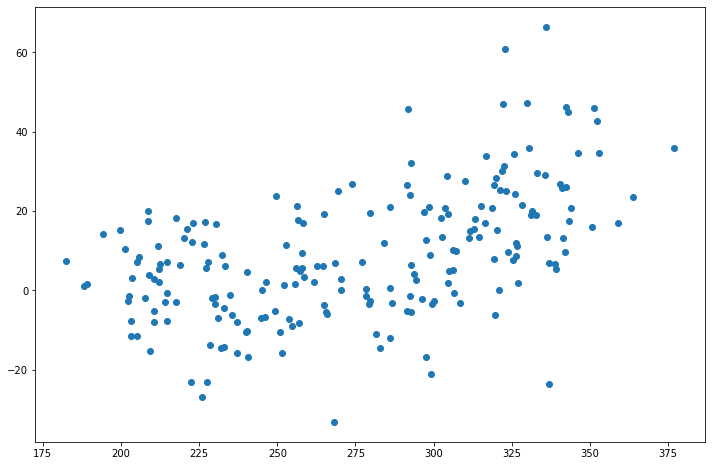

In [351]:
from scipy.interpolate import interp1d 

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)

ax.scatter(runs['runs.start'], runs['re24'])
# interp1d(runs['runs.start'], runs['re24'], kind='cubic')

# x, y = spline1(runs['runs.state'].values, runs['re24'].values, 203)
# fig = plt.figure(figsize=(12, 8))
# ax = fig.add_subplot(1,1,1)
# ax.plot(runs['runs.start'].values, y)

In [352]:
home_runs = data2016[data2016['event_cd']==23]
print(home_runs.shape)

home_runs.groupby('state_x').agg({'bat_id': 'count', 'run_value': 'sum'})

(5610, 54)


,bat_id,run_value
state_x,,
0000,1530,1530.000000
0001,957,957.000000
0002,845,845.000000
0010,12,13.814279
0011,39,51.909581
0012,61,105.789538
0100,98,133.769246
0101,150,239.257089
0102,158,283.407299


In [353]:
#シングル、ダブル、トリプル、ホームランの得点価値の平均
print(data2016[data2016['h_cd']==1]['run_value'].mean())
print(data2016[data2016['h_cd']==2]['run_value'].mean())
print(data2016[data2016['h_cd']==3]['run_value'].mean())
print(data2016[data2016['h_cd']==4]['run_value'].mean())

#フォアボール、デッドボールの得点価値の平均
print(data2016[data2016['event_cd'].isin([14, 15])]['run_value'].mean())
print(data2016[data2016['event_cd']==16]['run_value'].mean())

0.4394855152673472
0.7390083188695422
1.0144812485233834
1.3816001785082237
0.2849411761055873
0.317604646504243


In [354]:
#イベントごとの得点価値平均
data2016.groupby('event_cd')['run_value'].mean()

event_cd
2    -0.263530
3    -0.264535
4     0.179649
5     0.103072
6    -0.416944
8    -0.201114
9     0.260280
10    0.253268
11    0.277123
12   -0.471916
14    0.293005
15    0.162457
16    0.317605
17    0.310808
18    0.463906
19   -0.193153
20    0.439486
21    0.739008
22    1.014481
23    1.381600
Name: run_value, dtype: float64

### ランナー1塁時の、犠牲バントとそれ以外の得点価値平均

In [355]:
data2016.head()

,game_dt,game_id,home_team_id,away_team_id,inn_ct,bat_home_id,outs_ct,balls_ct,strikes_ct,bat_lineup_id,pitch_seq_tx,event_tx,away_score_ct,home_score_ct,bat_id,pit_id,start_bases_cd,event_cd,bat_event_fl,ab_fl,sf_fl,bunt_fl,h_cd,bat_dest_id,base1_run_id,base2_run_id,base3_run_id,run1_dest_id,run2_dest_id,run3_dest_id,event_outs_ct,battedball_cd,battedball_loc_tx,fld_cd,rbi_ct,runs,half.inning,runs.scored,outs.inning,runs.inning,runs.start,max.runs,runs.roi,bases,state_x,nrunner1,nrunner2,nrunner3,nouts,new.state,runs.state,state_y,runs.new.state,run_value
0,20160403,KCA201604030,KCA,NYN,1,0,0,2,2,1,CCBBFX,8/L,0,0,granc001,volqe001,0,2,T,T,F,F,0,0,nan,nan,nan,0,0,0,1,L,NaN,8,0,0,KCA20160403010,0,3,0,0,0,0,000,0000,0,0,0,1,0001,0.498168,0001,0.267903,-0.230266
1,20160403,KCA201604030,KCA,NYN,1,0,1,2,2,2,FSBBX,53/G,0,0,wrigd002,volqe001,0,2,T,T,F,F,0,0,nan,nan,nan,0,0,0,1,G,NaN,5,0,0,KCA20160403010,0,3,0,0,0,0,000,0001,0,0,0,2,0002,0.267903,0002,0.106208,-0.161695
2,20160403,KCA201604030,KCA,NYN,1,0,2,1,1,3,BCX,63/G-,0,0,cespy001,volqe001,0,2,T,T,F,F,0,0,nan,nan,nan,0,0,0,1,G,NaN,6,0,0,KCA20160403010,0,3,0,0,0,0,000,0002,0,0,0,3,0003,0.106208,NaN,0.000000,-0.106208
3,20160403,KCA201604030,KCA,NYN,1,1,0,0,0,1,X,53/G-,0,0,escoa003,harvm001,0,2,T,T,F,F,0,0,nan,nan,nan,0,0,0,1,G,NaN,5,0,0,KCA20160403011,0,3,1,0,1,1,000,0000,0,0,0,1,0001,0.498168,0001,0.267903,-0.230266
4,20160403,KCA201604030,KCA,NYN,1,1,1,2,1,2,CBBX,E7/L,0,0,mousm001,harvm001,0,18,T,T,F,F,0,1,nan,nan,nan,0,0,0,0,L,NaN,7,0,0,KCA20160403011,0,3,1,0,1,1,000,0001,1,0,0,1,1001,0.267903,1001,0.512134,0.244231


In [356]:
##ランナー1塁時の得点価値平均
data2016[data2016['bases']=='100']['run_value'].mean()

0.005067302757808528

In [359]:
##ランナー一塁時の犠牲バントの打席
data2016[(data2016['bases']=='100') & (data2016['bunt_fl']=='T')]

,game_dt,game_id,home_team_id,away_team_id,inn_ct,bat_home_id,outs_ct,balls_ct,strikes_ct,bat_lineup_id,pitch_seq_tx,event_tx,away_score_ct,home_score_ct,bat_id,pit_id,start_bases_cd,event_cd,bat_event_fl,ab_fl,sf_fl,bunt_fl,h_cd,bat_dest_id,base1_run_id,base2_run_id,base3_run_id,run1_dest_id,run2_dest_id,run3_dest_id,event_outs_ct,battedball_cd,battedball_loc_tx,fld_cd,rbi_ct,runs,half.inning,runs.scored,outs.inning,runs.inning,runs.start,max.runs,runs.roi,bases,state_x,nrunner1,nrunner2,nrunner3,nouts,new.state,runs.state,state_y,runs.new.state,run_value
46,20160403,KCA201604030,KCA,NYN,6,1,0,0,1,4,C1X,S5/BG.1-2,0,2,hosme001,harvm001,1,20,T,T,F,T,1,1,cainl001,nan,nan,2,0,0,0,G,NaN,5,0,2,KCA20160403061,0,3,2,2,4,2,100,1000,1,1,0,0,1100,0.857981,1100,1.444663,0.586683
95,20160403,PIT201604030,PIT,SLN,3,0,1,1,1,9,BLX,E2/TH/FO/BG.1-3,0,2,waina001,lirif001,1,18,T,T,F,T,0,1,gyorj001,nan,nan,3,0,0,0,G,NaN,2,0,2,PIT20160403030,0,3,0,2,2,0,100,1001,1,0,1,1,1011,0.512134,1011,1.195757,0.683623
662,20160404,MIL201604040,MIL,SFN,4,1,0,1,2,8,BL1LX,3/BP,5,3,peraw001,bumgm001,1,2,T,T,F,T,0,0,genns001,nan,nan,1,0,0,1,P,NaN,3,0,8,MIL20160404041,0,3,0,8,8,0,100,1000,1,0,0,1,1001,0.857981,1001,0.512134,-0.345847
779,20160404,OAK201604040,OAK,CHA,9,0,0,0,0,8,X,3/BP,4,3,navad001,dools001,1,2,T,T,F,T,0,0,lawrb002,nan,nan,1,0,0,1,P,NaN,3,0,7,OAK20160404090,0,3,0,7,7,0,100,1000,1,0,0,1,1001,0.857981,1001,0.512134,-0.345847
1103,20160405,ARI201604050,ARI,COL,3,0,0,0,0,9,X,36(1)/FO/BG,0,1,bettc001,mills001,1,2,T,T,F,T,0,1,lemad001,nan,nan,0,0,0,1,G,NaN,3,0,1,ARI20160405030,0,3,0,1,1,0,100,1000,1,0,0,1,1001,0.857981,1001,0.512134,-0.345847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189502,20161002,ARI201610020,ARI,SDN,5,0,1,1,0,9,BX,34/BG/SH.1-2,1,1,clemp002,kochm001,1,2,T,F,F,T,0,0,sardl001,nan,nan,2,0,0,1,G,NaN,3,0,2,ARI20161002050,0,3,0,2,2,0,100,1001,0,1,0,2,0102,0.512134,0102,0.312491,-0.199643
189521,20161002,ARI201610020,ARI,SDN,7,1,0,0,0,8,X,34/BG/SH.1-2,2,1,goset001,morrb001,1,2,T,F,F,T,0,0,hanim001,nan,nan,2,0,0,1,G,NaN,3,0,3,ARI20161002071,0,3,0,3,3,0,100,1000,0,1,0,1,0101,0.857981,0101,0.672856,-0.185125
189850,20161002,COL201610020,COL,MIL,2,1,1,1,1,9,LBX,14/BG/SH.1-2,2,1,marqg001,cravt001,1,2,T,F,F,T,0,0,adamc001,nan,nan,2,0,0,1,G,NaN,1,0,3,COL20161002021,0,3,1,3,4,1,100,1001,0,1,0,2,0102,0.512134,0102,0.312491,-0.199643
190086,20161002,PHI201610020,PHI,NYN,3,1,1,0,0,2,X,13/BG.1-2,0,0,parej002,ynoag001,1,2,T,T,F,T,0,0,hernc005,nan,nan,2,0,0,1,G,NaN,1,0,0,PHI20161002031,0,3,1,0,1,1,100,1001,0,1,0,2,0102,0.512134,0102,0.312491,-0.199643


In [360]:
data2016[(data2016['bases']=='100') & (data2016['bunt_fl']=='T')]['run_value'].mean()

-0.11243695058181903

### eatoa002とmarts002の比較

In [297]:
##eatoa002とmarts002の比較
eatoa = data2016[(data2016['bat_id']=='eatoa002') & (data2016['bat_event_fl']=='T')]
print(eatoa.shape)

marts = data2016[(data2016['bat_id']=='marts002') & (data2016['bat_event_fl']=='T')]
print(marts.shape)

##得点価値
print(eatoa['run_value'].describe())
print(marts['run_value'].describe())

(706, 54)
(529, 54)
count    706.000000
mean       0.018822
std        0.438201
min       -1.537215
25%       -0.230266
50%       -0.161695
75%        0.327962
max        2.730688
Name: run_value, dtype: float64
count    529.000000
mean       0.017925
std        0.461138
min       -0.920621
25%       -0.230266
50%       -0.161695
75%        0.265745
max        3.410936
Name: run_value, dtype: float64


In [285]:
eatoa_res = get_batting_results(data2016, 'eatoa002')
print(eatoa_res.shape)
eatoa_res.tail()

(706, 70)


,game_dt,game_id,home_team_id,away_team_id,inn_ct,bat_home_id,outs_ct,balls_ct,strikes_ct,bat_lineup_id,pitch_seq_tx,event_tx,away_score_ct,home_score_ct,bat_id,pit_id,start_bases_cd,event_cd,bat_event_fl,ab_fl,sf_fl,bunt_fl,h_cd,bat_dest_id,base1_run_id,base2_run_id,base3_run_id,run1_dest_id,run2_dest_id,run3_dest_id,event_outs_ct,battedball_cd,battedball_loc_tx,fld_cd,rbi_ct,runs,half.inning,runs.scored,outs.inning,runs.inning,runs.start,max.runs,runs.roi,bases,state_x,nrunner1,nrunner2,nrunner3,nouts,new.state,runs.state,state_y,runs.new.state,run_value,ab_cum,single_cum,double_cum,triple_cum,homerun_cum,hit_cum,base_hit_cum,rbi_cum,walk_cum,dead_cum,sf_cum,stout_cum,bat_ave_cum,on_base_cum,slug_cum,ops
189678,20161002,CHA201610020,CHA,MIN,1,1,0,0,0,1,X,9/L,1,0,eatoa002,berrj001,0,2,T,T,F,F,0,0,nan,nan,nan,0,0,0,1,L,NaN,9,0,1,CHA20161002011,0,3,0,1,1,0,000,0000,0,0,0,1,0001,0.498168,0001,0.267903,-0.230266,616,123,29,9,14,175,264,59,62,14,3,115,0.284,0.361,0.429,0.790
189698,20161002,CHA201610020,CHA,MIN,3,1,1,2,1,1,CBBX,S7/L,5,0,eatoa002,berrj001,0,20,T,T,F,F,1,1,nan,nan,nan,0,0,0,0,L,NaN,7,0,5,CHA20161002031,0,3,1,5,6,1,000,0001,1,0,0,1,1001,0.267903,1001,0.512134,0.244231,617,124,29,9,14,176,265,59,62,14,3,115,0.285,0.362,0.429,0.791
189713,20161002,CHA201610020,CHA,MIN,5,1,0,0,0,1,X,7/L,5,1,eatoa002,berrj001,0,2,T,T,F,F,0,0,nan,nan,nan,0,0,0,1,L,NaN,7,0,6,CHA20161002051,0,3,0,6,6,0,000,0000,0,0,0,1,0001,0.498168,0001,0.267903,-0.230266,618,124,29,9,14,176,265,59,62,14,3,115,0.285,0.362,0.429,0.791
189732,20161002,CHA201610020,CHA,MIN,7,1,1,3,2,1,BSBFBB,W,6,1,eatoa002,orour001,0,14,T,F,F,F,0,1,nan,nan,nan,0,0,0,0,NaN,NaN,0,0,7,CHA20161002071,0,3,1,7,8,1,000,0001,1,0,0,1,1001,0.267903,1001,0.512134,0.244231,618,124,29,9,14,176,265,59,63,14,3,115,0.285,0.362,0.429,0.791
189750,20161002,CHA201610020,CHA,MIN,9,1,1,2,2,1,SBFBX,63/G,6,3,eatoa002,kintb001,0,2,T,T,F,F,0,0,nan,nan,nan,0,0,0,1,G,NaN,6,0,9,CHA20161002091,0,3,0,9,9,0,000,0001,0,0,0,2,0002,0.267903,0002,0.106208,-0.161695,619,124,29,9,14,176,265,59,63,14,3,115,0.284,0.362,0.428,0.790


In [288]:
marts_res = get_batting_results(data2016, 'marts002')
print(marts_res.shape)
marts_res.tail()

(529, 70)


,game_dt,game_id,home_team_id,away_team_id,inn_ct,bat_home_id,outs_ct,balls_ct,strikes_ct,bat_lineup_id,pitch_seq_tx,event_tx,away_score_ct,home_score_ct,bat_id,pit_id,start_bases_cd,event_cd,bat_event_fl,ab_fl,sf_fl,bunt_fl,h_cd,bat_dest_id,base1_run_id,base2_run_id,base3_run_id,run1_dest_id,run2_dest_id,run3_dest_id,event_outs_ct,battedball_cd,battedball_loc_tx,fld_cd,rbi_ct,runs,half.inning,runs.scored,outs.inning,runs.inning,runs.start,max.runs,runs.roi,bases,state_x,nrunner1,nrunner2,nrunner3,nouts,new.state,runs.state,state_y,runs.new.state,run_value,ab_cum,single_cum,double_cum,triple_cum,homerun_cum,hit_cum,base_hit_cum,rbi_cum,walk_cum,dead_cum,sf_cum,stout_cum,bat_ave_cum,on_base_cum,slug_cum,ops
161068,20160905,PIT201609050,PIT,SLN,6,1,0,0,2,5,.FSFS,K,10,4,marts002,broxj001,0,3,T,T,F,F,0,0,nan,nan,nan,0,0,0,1,NaN,NaN,0,0,14,PIT20160905061,0,3,0,14,14,0,000,0000,0,0,0,1,0001,0.498168,0001,0.267903,-0.230266,485,102,34,5,9,150,221,46,23,16,0,103,0.309,0.361,0.456,0.817
161086,20160905,PIT201609050,PIT,SLN,8,1,1,0,2,5,FFX,S4/G,12,4,marts002,socom001,0,20,T,T,F,F,1,1,nan,nan,nan,0,0,0,0,G,NaN,4,0,16,PIT20160905081,0,3,0,16,16,0,000,0001,1,0,0,1,1001,0.267903,1001,0.512134,0.244231,486,103,34,5,9,151,222,46,23,16,0,103,0.311,0.362,0.457,0.819
178244,20160921,MIL201609210,MIL,PIT,9,0,0,0,2,9,.CTC,K,4,1,marts002,suteb001,1,3,T,T,F,F,0,0,mercj002,nan,nan,1,0,0,1,NaN,NaN,0,0,5,MIL20160921090,0,3,0,5,5,0,100,1000,1,0,0,1,1001,0.857981,1001,0.512134,-0.345847,487,103,34,5,9,151,222,46,23,16,0,104,0.310,0.361,0.456,0.817
179189,20160922,MIL201609220,MIL,PIT,1,0,1,1,2,2,CSBFFX,S8/L,0,0,marts002,andec001,0,20,T,T,F,F,1,1,nan,nan,nan,0,0,0,0,L,NaN,8,0,0,MIL20160922010,0,3,0,0,0,0,000,0001,1,0,0,1,1001,0.267903,1001,0.512134,0.244231,488,104,34,5,9,152,223,46,23,16,0,104,0.311,0.362,0.457,0.819
184661,20160927,PIT201609270,PIT,CHN,5,1,0,2,2,9,.FFFBBX,23/G-,4,1,marts002,lackj001,0,2,T,T,F,F,0,0,nan,nan,nan,0,0,0,1,G,NaN,2,0,5,PIT20160927051,0,3,0,5,5,0,000,0000,0,0,0,1,0001,0.498168,0001,0.267903,-0.230266,489,104,34,5,9,152,223,46,23,16,0,104,0.311,0.362,0.456,0.818


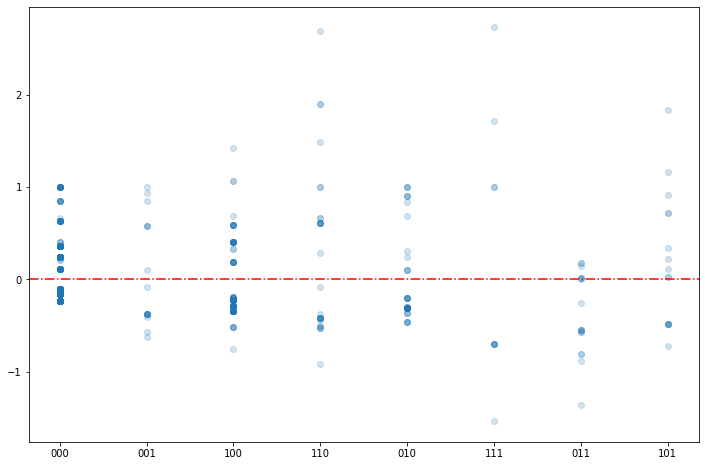

In [320]:
##eatoaのランナー別の得点価値
round(eatoa.groupby('bases', as_index=False)['run_value'].mean(), 3)

#得点圏時の得点価値
eatoa[eatoa['bases'].isin(['001', '010', '011', '101', '110', '111'])]['run_value'].mean()

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
ax.axhline(0, ls = "-.", color = "red")
ax.scatter(eatoa['bases'], eatoa['run_value'],alpha=0.2)

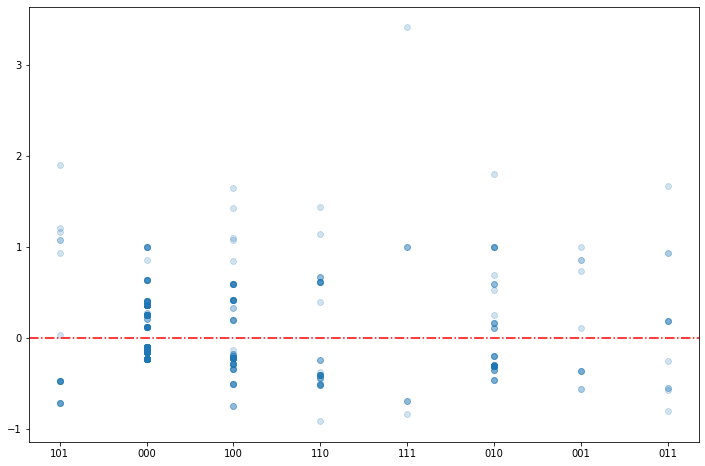

In [319]:
##martsのランナー別の得点価値
round(marts.groupby('bases', as_index=False)['run_value'].mean(), 3)

#得点圏時の得点価値
marts[marts['bases'].isin(['001', '010', '011', '101', '110', '111'])]['run_value'].mean()

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
ax.axhline(0, ls = "-.", color = "red")
ax.scatter(marts['bases'], marts['run_value'],alpha=0.2)

## 得点確率行列の作成

In [381]:
data2016[['home_score_ct', 'away_score_ct', 'bat_id', 'state_x', 'new.state', 'runs.scored', 'runs.roi']].head(100)

,home_score_ct,away_score_ct,bat_id,state_x,new.state,runs.scored,runs.roi
0,0,0,granc001,0000,0001,0,0
1,0,0,wrigd002,0001,0002,0,0
2,0,0,cespy001,0002,0003,0,0
3,0,0,escoa003,0000,0001,0,1
4,0,0,mousm001,0001,1001,0,1
5,0,0,cainl001,1001,0101,0,1
6,0,0,cainl001,0101,1101,0,1
7,0,0,hosme001,1101,1011,1,1
8,1,0,morak001,1011,0013,0,0
9,1,0,dudal001,0000,0001,0,0


In [382]:
data2016.loc[data2016['runs.roi']>0, 'runs.roi.fl'] = 1
data2016.loc[data2016['runs.roi']==0, 'runs.roi.fl'] = 0
data2016[['home_score_ct', 'away_score_ct', 'bat_id', 'state_x', 'new.state', 'runs.roi', 'runs.roi.fl']].head(100)

,home_score_ct,away_score_ct,bat_id,state_x,new.state,runs.roi,runs.roi.fl
0,0,0,granc001,0000,0001,0,0.0
1,0,0,wrigd002,0001,0002,0,0.0
2,0,0,cespy001,0002,0003,0,0.0
3,0,0,escoa003,0000,0001,1,1.0
4,0,0,mousm001,0001,1001,1,1.0
5,0,0,cainl001,1001,0101,1,1.0
6,0,0,cainl001,0101,1101,1,1.0
7,0,0,hosme001,1101,1011,1,1.0
8,1,0,morak001,1011,0013,0,0.0
9,1,0,dudal001,0000,0001,0,0.0


In [383]:
runs_ratio = data2016.groupby(['bases', 'outs_ct'], as_index=False).agg({'bat_id': 'count', 'runs.roi.fl': 'sum'})
runs_ratio['runs.ratio'] = runs_ratio['runs.roi.fl'] / runs_ratio['bat_id']
runs_ratio

,bases,outs_ct,bat_id,runs.roi.fl,runs.ratio
0,000,0,45515,12671.0,0.278392
1,000,1,32920,5412.0,0.164399
2,000,2,26429,1931.0,0.073064
3,001,0,518,433.0,0.835907
4,001,1,1854,1230.0,0.663430
5,001,2,2840,750.0,0.264085
6,010,0,3421,2106.0,0.615609
7,010,1,5419,2175.0,0.401366
8,010,2,6981,1499.0,0.214726
9,011,0,670,551.0,0.822388


In [384]:
runs_ratio.sort_values('runs.ratio', ascending=False)

'''
・ノーアウト時に3塁ランナーがいると得点確率高い（80%/程度）
・1アウト時に3塁ランナーがいる、またはノーアウト時に2塁ランナーがいる場合もも比較的高い（65%程度）
・ノーアウト1塁と1アウト2塁の得点確率はそんなに変わらない（40%程度）
・1アウト1塁と2アウト2塁だと1アウト1塁のほうが得点確率が5%程度高い（＝1アウト1塁時の犠牲バントは有用ではない？）
'''

,bases,outs_ct,bat_id,runs.roi.fl,runs.ratio
15,101,0,970,825.0,0.850515
3,001,0,518,433.0,0.835907
9,011,0,670,551.0,0.822388
21,111,0,701,575.0,0.820257
10,011,1,1572,1063.0,0.676209
4,001,1,1854,1230.0,0.663430
22,111,1,1702,1118.0,0.656874
16,101,1,2090,1350.0,0.645933
18,110,0,2566,1580.0,0.615744
6,010,0,3421,2106.0,0.615609


In [385]:
round(pd.pivot_table(runs_ratio, index='bases', columns='outs_ct', values='runs.ratio'), 3)

outs_ct,0,1,2
bases,,,
000,0.278,0.164,0.073
001,0.836,0.663,0.264
010,0.616,0.401,0.215
011,0.822,0.676,0.249
100,0.417,0.267,0.125
101,0.851,0.646,0.267
110,0.616,0.417,0.218
111,0.820,0.657,0.311


In [386]:
data2016[(data2016['bases']=='000') & (data2016['runs.scored']>0)]

,game_dt,game_id,home_team_id,away_team_id,inn_ct,bat_home_id,outs_ct,balls_ct,strikes_ct,bat_lineup_id,pitch_seq_tx,event_tx,away_score_ct,home_score_ct,bat_id,pit_id,start_bases_cd,event_cd,bat_event_fl,ab_fl,sf_fl,bunt_fl,h_cd,bat_dest_id,base1_run_id,base2_run_id,base3_run_id,run1_dest_id,run2_dest_id,run3_dest_id,event_outs_ct,battedball_cd,battedball_loc_tx,fld_cd,rbi_ct,runs,half.inning,runs.scored,outs.inning,runs.inning,runs.start,max.runs,runs.roi,bases,state_x,nrunner1,nrunner2,nrunner3,nouts,new.state,runs.state,state_y,runs.new.state,run_value,runs.scored.fl,runs.roi.fl
220,20160403,TBA201604030,TBA,TOR,9,1,0,0,2,4,FFFX,HR/9/L+,5,1,dickc002,strom001,0,23,T,T,F,F,4,4,nan,nan,nan,0,0,0,0,L,9,0,1,6,TBA20160403091,1,3,2,6,8,2,000,0000,0,0,0,0,0000,0.498168,0000,0.498168,1.0,1.0,1.0
324,20160404,ARI201604040,ARI,COL,3,0,0,3,2,3,CBSFBBX,HR/89/L,4,1,gonzc001,greiz001,0,23,T,T,F,F,4,4,nan,nan,nan,0,0,0,0,L,89,0,1,5,ARI20160404030,1,3,6,1,7,2,000,0000,0,0,0,0,0000,0.498168,0000,0.498168,1.0,1.0,1.0
337,20160404,ARI201604040,ARI,COL,4,0,1,2,0,2,BBX,HR/78/F,6,1,stort001,greiz001,0,23,T,T,F,F,4,4,nan,nan,nan,0,0,0,0,F,78,0,1,7,ARI20160404040,1,3,1,7,8,1,000,0001,0,0,0,1,0001,0.267903,0001,0.267903,1.0,1.0,1.0
398,20160404,ATL201604040,ATL,WAS,1,0,2,2,2,3,BBCSFF1F1.X,HR/9/F,0,0,harpb003,tehej001,0,23,T,T,F,F,4,4,nan,nan,nan,0,0,0,0,F,9,0,1,0,ATL20160404010,1,3,1,0,1,1,000,0002,0,0,0,2,0002,0.106208,0002,0.106208,1.0,1.0,1.0
404,20160404,ATL201604040,ATL,WAS,1,1,2,2,2,3,BBSSX,HR/8/F,1,0,freef001,schem001,0,23,T,T,F,F,4,4,nan,nan,nan,0,0,0,0,F,8,0,1,1,ATL20160404011,1,3,1,1,2,1,000,0002,0,0,0,2,0002,0.106208,0002,0.106208,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189836,20161002,COL201610020,COL,MIL,1,1,0,3,2,1,BSBFBX,HR/9/F,0,0,blacc001,cravt001,0,23,T,T,F,F,4,4,nan,nan,nan,0,0,0,0,F,9,0,1,0,COL20161002011,1,3,1,0,1,1,000,0000,0,0,0,0,0000,0.498168,0000,0.498168,1.0,1.0,1.0
189963,20161002,KCA201610020,KCA,CLE,5,1,0,1,1,8,BFX,HR/78/F,2,1,cuthc001,tomlj001,0,23,T,T,F,F,4,4,nan,nan,nan,0,0,0,0,F,78,0,1,3,KCA20161002051,1,3,1,3,4,1,000,0000,0,0,0,0,0000,0.498168,0000,0.498168,1.0,1.0,1.0
190023,20161002,NYA201610020,NYA,BAL,4,1,0,0,1,4,FX,HR/9/F,3,0,mccab002,gausk001,0,23,T,T,F,F,4,4,nan,nan,nan,0,0,0,0,F,9,0,1,3,NYA20161002041,1,3,1,3,4,1,000,0000,0,0,0,0,0000,0.498168,0000,0.498168,1.0,1.0,1.0
190143,20161002,SEA201610020,SEA,OAK,1,0,2,0,0,3,X,HR/7/L,0,0,vogts001,hernf002,0,23,T,T,F,F,4,4,nan,nan,nan,0,0,0,0,L,7,0,1,0,SEA20161002010,1,3,1,0,1,1,000,0002,0,0,0,2,0002,0.106208,0002,0.106208,1.0,1.0,1.0
